In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn import datasets

C:\Users\Desktop\anaconda3\envs\pytorch_gpu\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
x, y = datasets.make_moons(200,noise=0.20)
x.shape,y.shape

((200, 2), (200,))

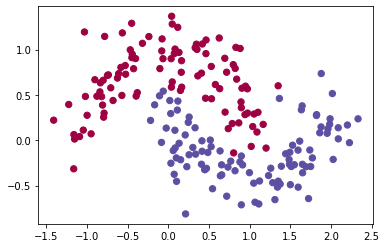

In [3]:
plt.scatter(x[:,0],x[:,1],s=40,c=y,cmap=plt.cm.Spectral);

In [4]:
x = torch.FloatTensor(x)
y = torch.LongTensor(y)

In [5]:
class FeedForward(nn.Module):
    def __init__(self, input_neurons, hidden_neurons, output_neurons):
        super(FeedForward,self).__init__()
        self.hidden = nn.Linear(input_neurons,hidden_neurons)
        self.out = nn.Linear(hidden_neurons,output_neurons)
    
    def forward(self, x):
        out = self.hidden(x)
        out = F.relu(out)
        out = self.out(out)
        return out

In [6]:
network = FeedForward(input_neurons=2, hidden_neurons=50, output_neurons=2)
optimizer = torch.optim.SGD(network.parameters(),lr = 0.02)
loss_function = nn.CrossEntropyLoss()

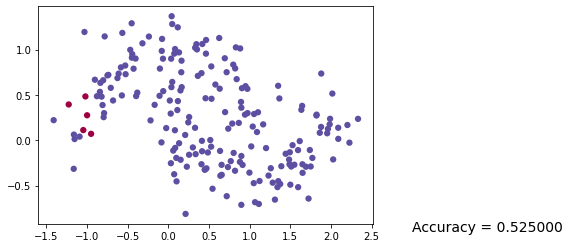

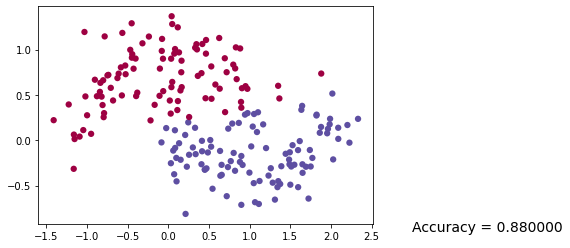

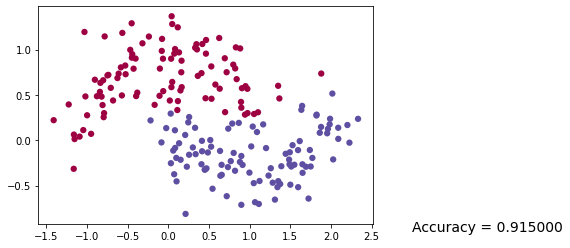

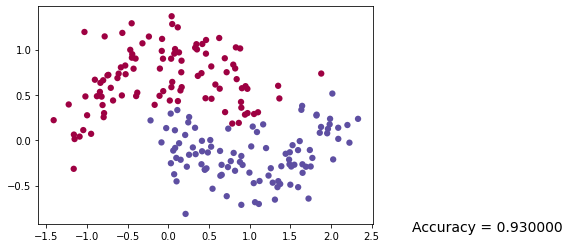

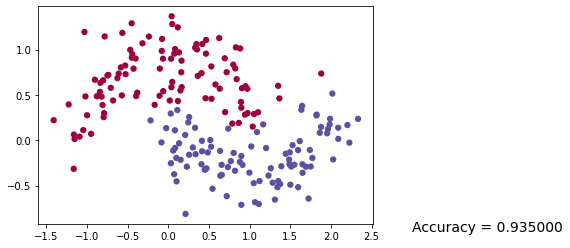

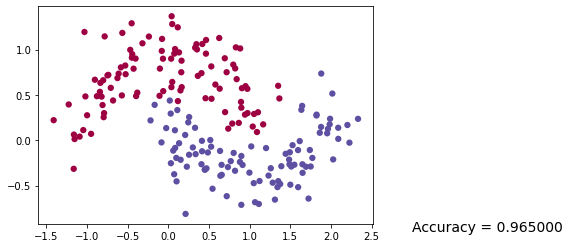

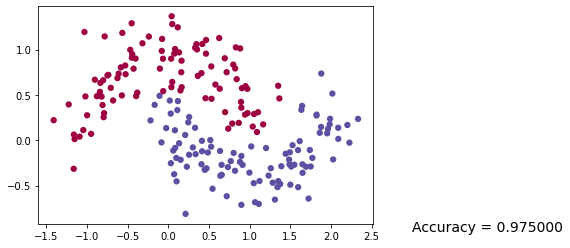

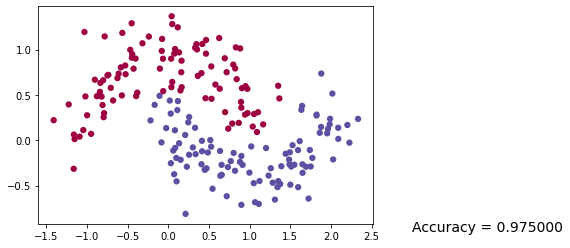

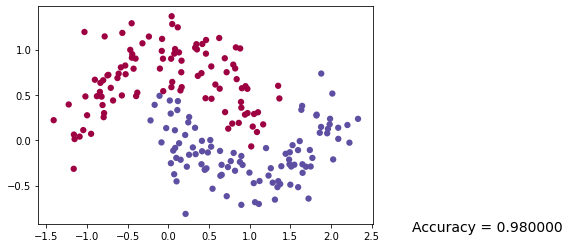

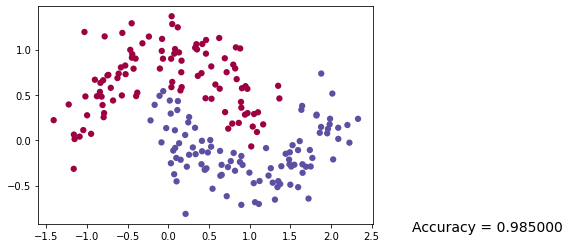

In [7]:
epochs = 10000
plt.ion()
for epoch in range(epochs):
    out = network(x)   #same as we call network.forward(x)=network(x)
    loss = loss_function(out,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 1000 == 0:
        max_value, prediction = torch.max(out,1)
        predicted_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1],s=40,c=predicted_y,cmap=plt.cm.Spectral,lw = 0)
        accuracy = (predicted_y == target_y).sum()/target_y.size
        plt.text(3,-1,f"Accuracy = {accuracy:2f}",fontdict= {'size':14})
        plt.pause(0.1)

plt.ioff()
plt.show();


In [12]:
!git commit -m "3_visualization_process"

On branch master
Your branch is up to date with 'master/master'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	new file:   .ipynb_checkpoints/Untitled-checkpoint.ipynb
	new file:   Untitled.ipynb

Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	deleted:    ../.gitignore

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	../1_basics/.ipynb_checkpoints/
	../2_diabetes_project/.ipynb_checkpoints/

